## Data loading and initial inspection

### Subtask:
Load the dataset and perform initial checks like viewing the head, shape, data types, and missing values.


In [102]:
from google.colab import files
files=files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [103]:
import pandas as pd
import numpy as np
df=pd.DataFrame()


In [104]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
print(df.shape)
df.info()
print(df.isna().sum())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

## Data cleaning and preprocessing

### Subtask:
Group all data cleaning and preprocessing steps, such as handling missing values and encoding categorical features, into a dedicated section.


**Reasoning**:
Convert the 'TotalCharges' column to numeric, handling errors by coercing to NaN. This is the first step in cleaning this column.



In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

**Reasoning**:
Impute the missing values in 'TotalCharges' using the mean strategy. This is the next step in handling the 'TotalCharges' column as requested by the instructions.



In [ ]:
from sklearn.impute import SimpleImputer
data_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['TotalCharges'] = data_imputer.fit_transform(df[['TotalCharges']])

**Reasoning**:
Convert the 'Churn' column to numerical (Yes=1, No=0). This is a preprocessing step to prepare the target variable for modeling.



In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

**Reasoning**:
Perform one-hot encoding on the specified categorical columns, convert resulting boolean columns to integers, and drop the 'customerID' column. This completes the remaining preprocessing steps outlined in the instructions.



In [ ]:
categorical_cols_to_encode = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

for col in df_encoded.columns:
    if df_encoded[col].dtype == bool:
        df_encoded[col] = df_encoded[col].astype(int)

df_encoded.drop('customerID', inplace=True, axis=1)

## Exploratory data analysis (eda)

### Subtask:
Create a section for all the visualizations and analysis of the data to understand relationships and distributions.


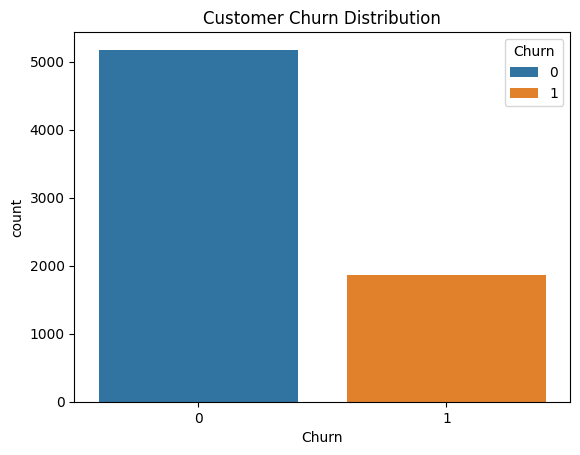

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting churn distribution
sns.countplot(x='Churn', data=df, hue='Churn')
plt.title('Customer Churn Distribution')
plt.show()

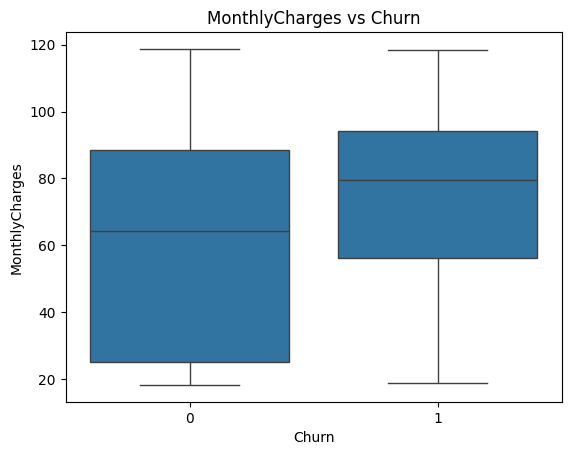

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')
plt.show()

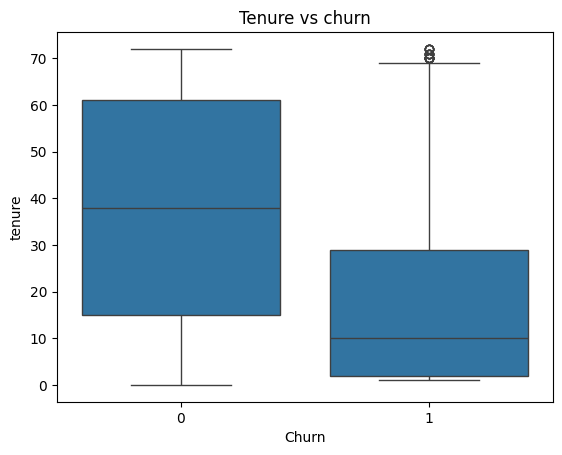

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs churn')
plt.show()

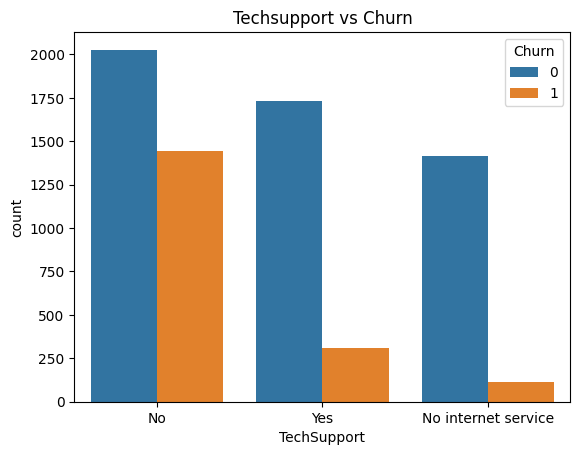

Churn,0,1
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting TechSupport vs Churn
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Techsupport vs Churn')
plt.show()

display(pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100)

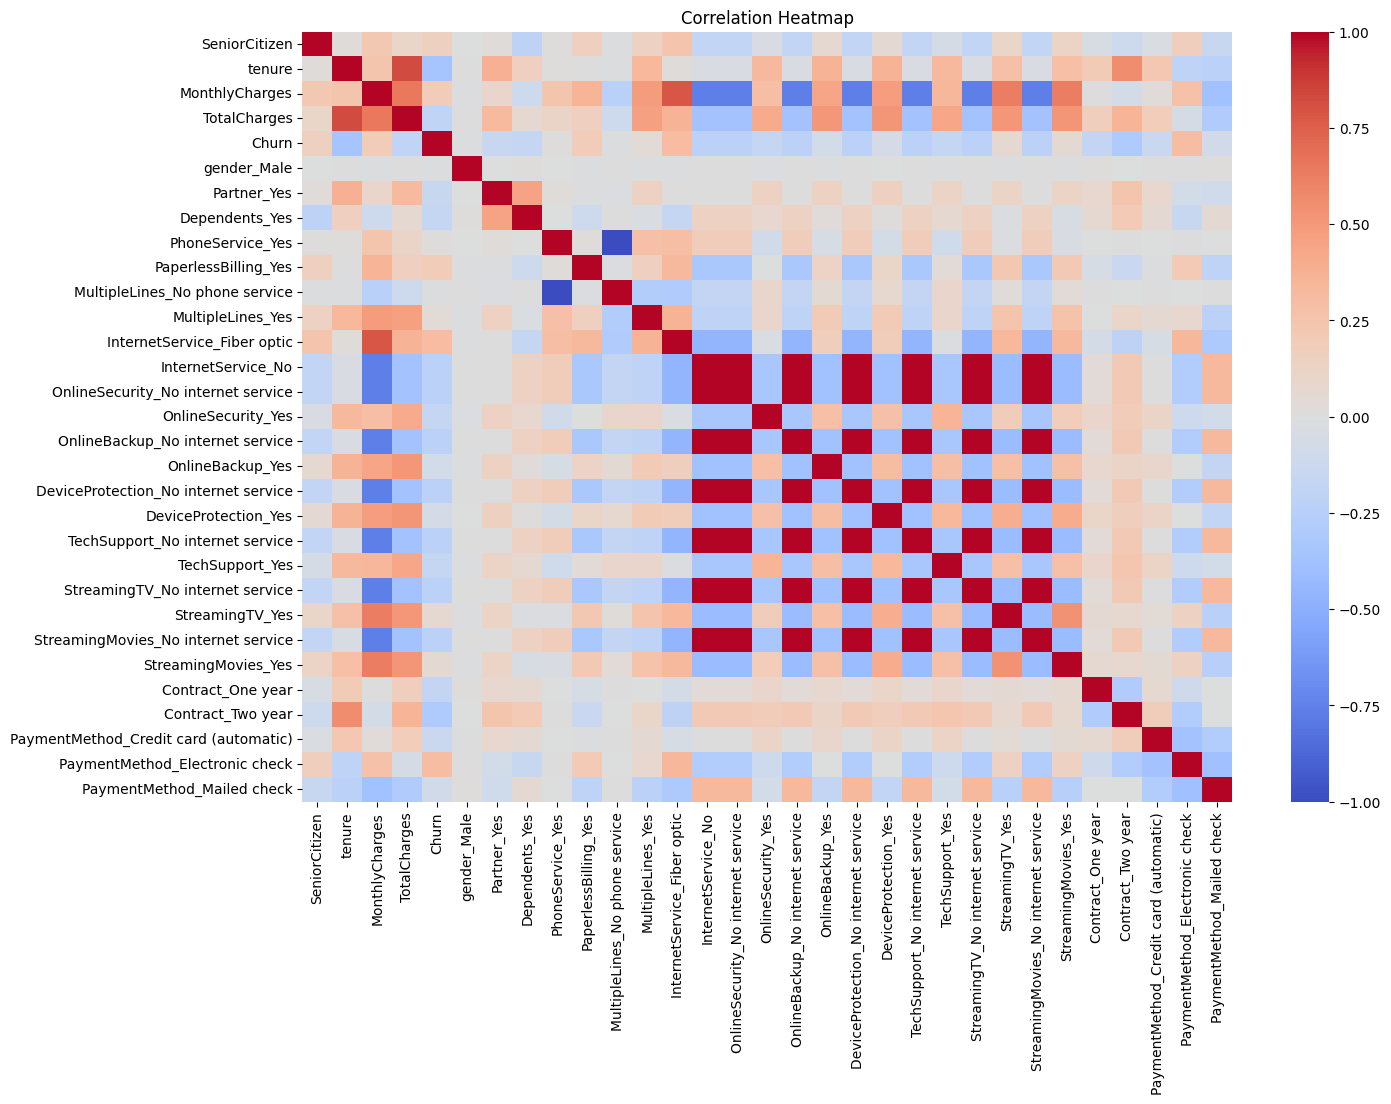

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Feature engineering

### Subtask:
Create new features that might improve model performance.


In [ ]:
df['HighMonthlyCharge'] = (df['MonthlyCharges'] > 80).astype(int)
df['HasTechSupport'] = df['TechSupport'].map({
    'Yes': 1,
    'No': 0,
    'No internet service': 0
})
df['HasInternetService'] = df['InternetService'].map({
    'No': 0,
    'DSL': 1,
    'Fiber optic': 1
})

## Model selection and training

### Subtask:
Combine the code for splitting data, training different models, and evaluating their performance into a single section.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print("-" * 30)

    results.append({
        'MOdel': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
display(results_df)

Logistic Regression:
  Accuracy: 0.8176
  Precision: 0.6790
  Recall: 0.5898
  F1 Score: 0.6313
------------------------------
RandomForestClassifier:
  Accuracy: 0.7977
  Precision: 0.6606
  Recall: 0.4853
  F1 Score: 0.5595
------------------------------
KNeighborsClassifier:
  Accuracy: 0.7771
  Precision: 0.5974
  Recall: 0.4853
  F1 Score: 0.5355
------------------------------


,MOdel,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.817601,0.679012,0.589812,0.631277
1,RandomForestClassifier,0.797729,0.660584,0.485255,0.559505
2,KNeighborsClassifier,0.777147,0.597360,0.485255,0.535503


## Feature importance

### Subtask:
Include the code for calculating and visualizing feature importance in its own section.


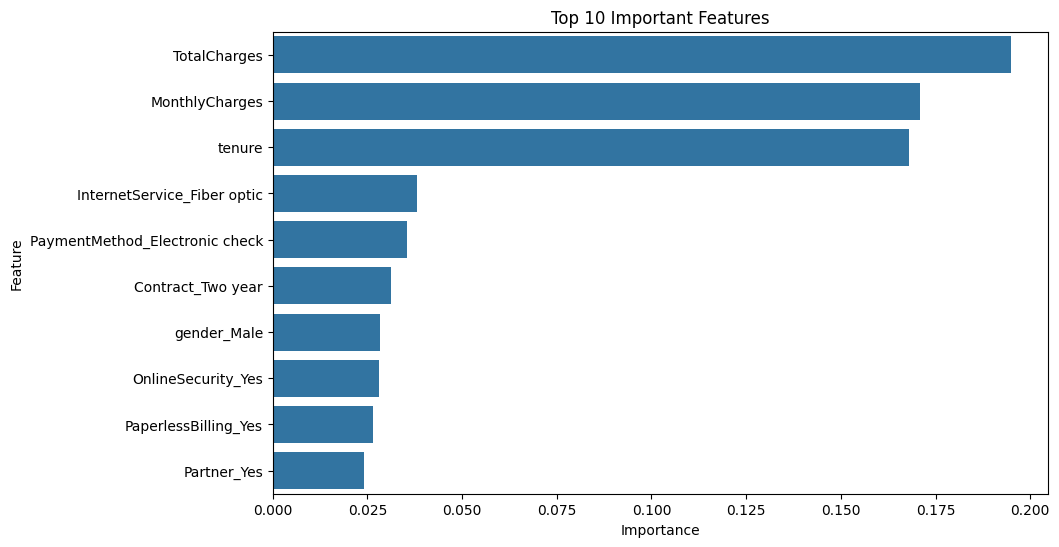

In [ ]:
# Get feature importance from the trained RandomForestClassifier model
importances = rf_model_for_importance.feature_importances_
features = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plotting the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

## Hyperparameter tuning

### Subtask:
Group the code for hyperparameter tuning (GridSearchCV for XGBoost) in a dedicated section.


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, 2, 3]  # handle class imbalance
}

# GridSearchCV for XGBoost
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',       # or 'accuracy', but f1 is better for imbalance
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

# Best model & parameters
print("✅ Best Parameters:", grid.best_params_)
print("✅ Best F1 Score on CV:", grid.best_score_)

best_model = grid.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 3}
✅ Best F1 Score on CV: 0.6234594731927049


## Model training and evaluation

### Subtask:
Predict and evaluate the performance of the best XGBoost model on the test set.


**Reasoning**:
Predict and evaluate the performance of the best XGBoost model on the test set, including calculating various metrics and predicted probabilities.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Get predicted probabilities for the positive class (churn)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate and print evaluation metrics
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("🎯 F1 Score:", f1_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Print a few predicted probabilities
print("\nSample Predicted Probabilities (Churn):\n", y_probs[:10])

🎯 Accuracy: 0.752306600425834
🎯 F1 Score: 0.633788037775446

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.52      0.81      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409


📊 Confusion Matrix:
 [[758 278]
 [ 71 302]]

Sample Predicted Probabilities (Churn):
 [0.92967045 0.25399306 0.02755766 0.9556341  0.02171635 0.43730953
 0.05500414 0.01043435 0.35998935 0.59233105]


In [ ]:
import joblib

joblib.dump(best_model, "xgb_churn_model.pkl")

['xgb_churn_model.pkl']

## Summary:

### Data Analysis Key Findings

*   The dataset "WA\_Fn-UseC\_-Telco-Customer-Churn.csv" was successfully loaded, containing 7043 rows and 21 columns.
*   The `TotalCharges` column was initially identified as an `object` type and contained non-numeric values which were handled by coercing to NaN and then imputing with the mean.
*   The target variable `Churn` was converted to a binary numerical format (0 for 'No', 1 for 'Yes').
*   Categorical features were successfully one-hot encoded, and the 'customerID' column was removed.
*   Exploratory Data Analysis revealed insights into customer churn based on `MonthlyCharges`, `tenure`, and `TechSupport`.
*   Three new features (`HighMonthlyCharge`, `HasTechSupport`, `HasInternetService`) were created.
*   Three models (Logistic Regression, RandomForestClassifier, KNeighborsClassifier) were trained and evaluated, with performance metrics like accuracy, precision, recall, and F1 score calculated.
*   Feature importance analysis was performed on the RandomForestClassifier model, identifying key features influencing churn.
*   Hyperparameter tuning using GridSearchCV was performed for an XGBoost model, resulting in a best F1 score of approximately 0.6235 on cross-validation with the best parameters being `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 3}`.
*   The best trained XGBoost model achieved an accuracy of 0.7523 and an F1 score of 0.6338 on the test set.
*   The best trained XGBoost model was successfully saved to the file "xgb\_churn\_model.pkl".
